In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import warnings
import time
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('mini-project2 .csv')

# Data Processing

## Data Cleaning

In [ ]:
# Get data shape
data.shape

(97748, 24)

In [ ]:
data.head(3)

,Unnamed: 0.1,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
1,2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2,2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1


In [ ]:
# Get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97748 entries, 0 to 97747
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           97748 non-null  int64  
 1   Unnamed: 0             97748 non-null  int64  
 2   trans_date_trans_time  97748 non-null  object 
 3   cc_num                 97748 non-null  int64  
 4   merchant               97748 non-null  object 
 5   category               97748 non-null  object 
 6   amt                    97748 non-null  float64
 7   first                  97748 non-null  object 
 8   last                   97748 non-null  object 
 9   gender                 97748 non-null  object 
 10  street                 97748 non-null  object 
 11  city                   97748 non-null  object 
 12  state                  97748 non-null  object 
 13  zip                    97748 non-null  int64  
 14  lat                    97748 non-null  float64
 15  lo

In [ ]:
# Drop 2 first columns
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [ ]:
# Change "trans_date_trans_time" datatypes
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97748 entries, 0 to 97747
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  97748 non-null  datetime64[ns]
 1   cc_num                 97748 non-null  int64         
 2   merchant               97748 non-null  object        
 3   category               97748 non-null  object        
 4   amt                    97748 non-null  float64       
 5   first                  97748 non-null  object        
 6   last                   97748 non-null  object        
 7   gender                 97748 non-null  object        
 8   street                 97748 non-null  object        
 9   city                   97748 non-null  object        
 10  state                  97748 non-null  object        
 11  zip                    97748 non-null  int64         
 12  lat                    97748 non-null  float64       
 13  l

In [ ]:
# Checking numeric values
data.describe()

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,97748,9.774800e+04,97748.000000,97748.000000,97748.000000,97748.000000,9.774800e+04,9.774800e+04,97748.000000,97748.000000,97748.000000
mean,2019-10-02 21:36:21.375905536,4.103967e+17,102.832444,48776.833807,38.525509,-90.210550,8.830390e+04,1.349189e+09,38.524928,-90.210050,0.076789
min,2019-01-01 00:05:08,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.031242,-166.654993,0.000000
25%,2019-06-02 17:05:30.750000128,1.800429e+14,10.567500,26041.000000,34.668900,-96.790900,7.430000e+02,1.338657e+09,34.749667,-96.864098,0.000000
50%,2019-10-02 21:39:46.500000,3.521815e+15,50.160000,48088.000000,39.342600,-87.458100,2.471000e+03,1.349214e+09,39.349543,-87.391641,0.000000
75%,2020-01-27 08:47:26.249999872,4.642255e+15,91.782500,72042.000000,41.894800,-80.128400,2.047800e+04,1.359276e+09,41.944618,-80.207857,0.000000
max,2020-06-21 12:13:37,4.992346e+18,15047.030000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.510267,-66.980744,1.000000
std,NaN,1.298122e+18,217.047969,26937.012679,5.079548,13.799118,2.985310e+05,1.287321e+07,5.114803,13.813079,0.266258


In [ ]:
# Check columns with missing values & missing percentage
missing_dict = {'volume':data.isnull().sum(), 'missing_percentage':data.isnull().sum()/data.shape[0]*100}
missing_df = pd.DataFrame(missing_dict)
missing_df

,volume,missing_percentage
trans_date_trans_time,0,0.0
cc_num,0,0.0
merchant,0,0.0
category,0,0.0
amt,0,0.0
first,0,0.0
last,0,0.0
gender,0,0.0
street,0,0.0
city,0,0.0


In [ ]:
# Check duplicate values
duplicate_count = data.duplicated().sum()
print(f'There are {duplicate_count} duplicate values')

There are 0 duplicate values


# Feature Engineering

## Transform Transaction Time To Hours

In [ ]:
# Transform transaction time to hours
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data[['trans_date_trans_time','trans_hour']].head(3)

,trans_date_trans_time,trans_hour
0,2019-01-02 01:06:37,1
1,2019-01-02 01:47:29,1
2,2019-01-02 03:05:23,3


## User Age

In [ ]:
# Transform users' dob to age
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = (data['trans_date_trans_time'] - data['dob']).dt.days/365
data['age'] = round(data['age'])
data[['trans_date_trans_time','dob','age']].head(3)

,trans_date_trans_time,dob,age
0,2019-01-02 01:06:37,1988-09-15,30.0
1,2019-01-02 01:47:29,1960-10-28,58.0
2,2019-01-02 03:05:23,1960-10-28,58.0


## Select potential feature

In [ ]:
exclude_cols = ['trans_date_trans_time', 'cc_num','first','last','dob','trans_num','unix_time',
               'long','lat','merch_lat','merch_long','street','city','state','zip','city_pop']
data.drop(columns = exclude_cols, inplace=True)
data.head(2)

,merchant,category,amt,gender,job,is_fraud,trans_hour,age
0,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Soil scientist,1,1,30.0
1,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,Horticultural consultant,1,1,58.0


## Encoding

In [ ]:
cate_cols = data.select_dtypes(include=['object'])
for col in cate_cols:
    print(f"{col}:{data[col].nunique()}")

merchant:693
category:14
gender:2
job:494


In [ ]:
list_column = ['category','gender','job']
df_encoded = pd.get_dummies(data, columns = list_column, drop_first=True)
df_encoded.head(2)

,merchant,amt,is_fraud,trans_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,fraud_Rutherford-Mertz,281.06,1,1,30.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,"fraud_Jenkins, Hauck and Friesen",11.52,1,1,58.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_encoded.drop(columns='merchant', inplace=True)
df_encoded.head(2)

,amt,is_fraud,trans_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,281.06,1,1,30.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,11.52,1,1,58.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Model Training

## Split train/test/validate set

In [ ]:
# Split train/test/validate set
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns='is_fraud', axis = 1)
y = df_encoded['is_fraud']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Number data of train set: {len(X_train)}")
print(f"Number data of validate set: {len(X_val)}")
print(f"Number data of test set: {len(X_test)}")

Number data of train set: 68423
Number data of validate set: 14662
Number data of test set: 14663


## Normalize for each data set

In [ ]:
# Normalize for each data set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Applying Model

### Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_scaled, y_train)

y_pred_val = lr_model.predict(X_val_scaled)
y_pred_train = lr_model.predict(X_train_scaled)

### Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=15, random_state=0, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

y_rf_pred_val = rf_model.predict(X_val_scaled)
y_rf_pred_train = rf_model.predict(X_train_scaled)

# Model Evaluation

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

### Logistic Regression

In [ ]:
# Logistic Regression
banlanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
banlanced_accuracy_val = balanced_accuracy_score(y_val, y_pred_val)
print(f"Train set balanced accuracy: {banlanced_accuracy_train}")
print(f"Validation set balanced accuracy: {banlanced_accuracy_val}")

Train set balanced accuracy: 0.6963936955982388
Validation set balanced accuracy: 0.7421507926767873


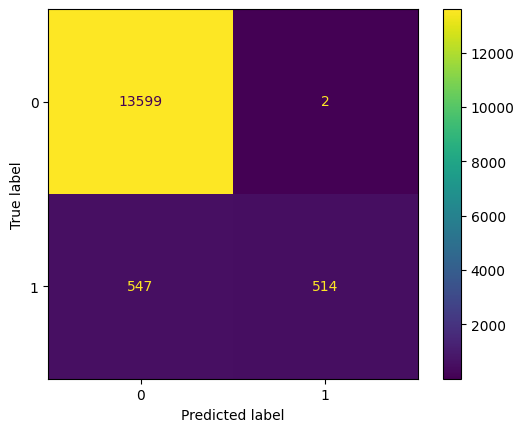

In [ ]:
cm = confusion_matrix(y_val, y_pred_val, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()

### Random Forest

In [ ]:
# Random Forest
banlanced_accuracy_train = balanced_accuracy_score(y_train, y_rf_pred_train)
banlanced_accuracy_val = balanced_accuracy_score(y_val, y_rf_pred_val)
print(f"Train set balanced accuracy: {banlanced_accuracy_train}")
print(f"Validation set balanced accuracy: {banlanced_accuracy_val}")

Train set balanced accuracy: 0.7613978115598226
Validation set balanced accuracy: 0.7421507926767873


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 100],
    'max_depth': [None, 15]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'max_depth': None, 'n_estimators': 100}


In [ ]:
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = best_clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)